## 확률(Prpbability)

베이지안 통계의 설립은 베이지안 이론이다.
베이지안이론의 구축은 조건부 확률

In this chapter, we'll start with conditional probability, derive Bayes's Theorem, and demonstrate it using a real dataset.<br>
In the next chapter, we'll use Bayes's Theorem to solve problems related to conditional probability.<br>
In the chapters that follow, 베이지안 이론으로부터 통계학까지 전환하고 차이를 설명

## Linda the Banker

To introduce conditional probability, I'll use an example from a [famous experiment by Tversky and Kahneman](https://en.wikipedia.org/wiki/Conjunction_fallacy), who posed the following question:

> Linda is 31 years old, single, outspoken, and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in anti-nuclear demonstrations.  Which is more probable?
> 1. Linda is a bank teller.
> 2. Linda is a bank teller and is active in the feminist movement.

Many people choose the second answer, presumably because it seems more consistent with the description. <br> 
It seems uncharacteristic if Linda is *just* a bank teller; it seems more consistent if she is also a feminist.

그러나 두 번째 대답은 질문에서 묻는 것처럼 "더 가능성이" 있을 수 없습니다. Linda의 설명에 맞는 사람 1000명을 찾고 그 중 10명이 은행원으로 일하고 있다고 가정해 보겠습니다. 그 중 페미니스트도 몇 명이나 되나요? 많아야 10개 모두입니다. 이 경우 두 가지 옵션의 가능성은 동일합니다. 10개 미만이면 두 번째 옵션의 가능성이 낮습니다. 그러나 두 번째 옵션이 더 가능성이 높을 수는 없습니다.

두 번째 옵션을 선택하고 싶다면 좋은 친구가 있는 것입니다. 생물학자 스티븐 J. 굴드(Stephen J. Gould)는 다음과 같이 썼습니다.

나는 이 예를 특히 좋아하는데, 그 이유는 [두 번째] 진술이 개연성이 가장 낮음에도 불구하고 내 머릿속의 작은 호문쿨루스가 계속해서 위아래로 뛰어오르며 나에게 이렇게 소리치기 때문입니다. "하지만 그녀는 단지 은행원이 될 수 없어요. 설명을 읽어보세요."

당신 머릿속의 작은 사람이 여전히 불행하다면 아마도 이 장이 도움이 될 것입니다.

확률은 통계 및 수학에서 중요한 개념 중 하나입니다. 여러분이 제시한 정의처럼 확률은 유한한 집합의 분수로 정의할 수 있습니다.

예를 들어, 1000명의 사람을 조사했을 때 그 중 20명이 은행 직원이라면, 은행 직원으로 일하는 비율은 0.02 또는 2%입니다. 이 인구 중에서 임의로 한 명을 선택한다면 그 사람이 은행 직원일 확률은 2%입니다. "임의로" 선택한다는 말은 데이터 집합 내의 모든 사람이 선택될 가능성이 동일하다는 것을 의미합니다.

이 정의와 적절한 데이터 집합을 사용하여 카운팅을 통해 확률을 계산할 수 있습니다. 이를 보여주기 위해 General Social Survey (GSS) 데이터를 사용해보겠습니다. 여기서 확률 계산이나 GSS 데이터와 관련된 특정 질문 또는 도움이 필요한 내용이 있다면 언제든지 물어보세요. 도움을 드릴 준비가 되어 있습니다.

In [1]:
from os.path import basename,exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print(local + ' 에서 다운로드됨')
        
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/data/gss_bayes.csv')

데이터를 pandas를 이용해서 읽어서 DataFrame으로 저장

In [3]:
import pandas as pd
gss = pd.read_csv('gss_bayes.csv',index_col=0)
gss.head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


The `DataFrame` 내가 선택한 각 변수에 대한 하나의

The columns are

* `caseid`: Respondent id (which is the index of the table).

* `year`: Year when the respondent was surveyed.

* `age`: Respondent's age when surveyed.

* `sex`: Male or female.

* `polviews`: Political views on a range from liberal to conservative.

* `partyid`: Political party affiliation, Democrat, Independent, or Republican.

* `indus10`: [Code](https://www.census.gov/cgi-bin/sssd/naics/naicsrch?chart=2007) for the industry the respondent works in.

Let's look at these variables in more detail, starting with `indus10`.

In [4]:
banker = (gss['indus10']==6870)
# banker.head()
print('sum : ' , banker.sum(),', mean : ', banker.mean())

sum :  728 , mean :  0.014769730168391155


In [71]:
prob(gss['indus10']==6870)

0.014769730168391155

In [5]:
def prob(A):
    """
        A의 확률 구하기
    """
    return A.mean()

In [6]:
def prob_m(A):
    return A.sum()/A.count()

In [7]:
prob(banker)

0.014769730168391155

In [8]:
prob_m(banker)

0.014769730168391155

In [9]:
female = (gss['sex']==2)
prob(female)

0.5378575776019476

이 데이터 집합에 있는 여성의 비율이 성인 미국 인구보다 높은 이유는 GSS가 감옥이나 군사 주택과 같은 기관에 거주하는 사람들을 포함하지 않기 때문입니다. 이러한 인구는 일반적으로 남성이 많기 때문에 여성의 비율이 상대적으로 높게 나타납니다.

1	극도로 진보적 <br>
2	진보적 <br>
3	약간 진보적 <br>
4	중도 <br>
5	약간 보수적 <br>
6	보수적 <br>
7	극도로 보수적<br>

만약 이 데이터 집합에서 무작위로 한 명의 사람을 선택한다면, 그 사람이 진보적인 확률은 약 27% 정도입니다.

In [10]:
liberal = (gss['polviews']<=3)
liberal
#진보적인 사람

caseid
1       False
2       False
5       False
6       False
7       False
        ...  
2863     True
2864    False
2865    False
2866    False
2867    False
Name: polviews, Length: 49290, dtype: bool

partyid 변수의 값은 다음과 같이 인코딩되어 있습니다:

In [11]:
liberal2 = (gss['partyid']<3)
prob(liberal2)

0.4915804422803814

In [12]:
democrat = gss['partyid']<=1
prob(banker & democrat)

0.004686548995739501

In [13]:
prob(democrat & banker) # 교환 법칙

0.004686548995739501

0	강력한 민주당 지지자<br>
1	강한 민주당 지지자가 아닌 민주당 지지자<br>
2	독립형, 민주당 쪽 가까움<br>
3	독립형<br>
4	독립형, 공화당 쪽 가까움<br>
5	강한 공화당 지지자가 아닌 공화당 지지자<br>
6	강한 공화당 지지자<br>
7	다른 정당<br>

이제 확률의 정의와 확률을 계산하는 함수가 준비되었으니, "Conjunction(연역)"에 대해 이야기해 봅시다.

"Conjunction(연역)"은 논리적 and 연산을 나타내는 다른 용어입니다. 두 개의 proposition(명제)인 A와 B가 있다면, A and B의 연역은 A와 B 모두 True일 때 True이고, 그렇지 않으면 False입니다.

두 개의 불리언 시리즈가 있다면 & 연산자를 사용하여 그들의 연역을 계산할 수 있습니다. 예를 들어, 우리는 이미 응답자가 은행원인 확률을 계산했습니다.

이제 응답자가 은행원이면서 민주당 지지자인 확률을 계산할 수 있습니다:

응답자가 은행원인 확률을 계산하고 저장합니다.
응답자가 민주당 지지자인 확률을 계산하고 저장합니다.
두 확률을 연역하여 (둘 다 True일 때) 응답자가 은행원이면서 민주당 지지자인 확률을 계산합니다.
여기서 계산을 위해 필요한 데이터와 정보를 제공해 주세요. 계산을 도와드리겠습니다.

## 조건부 확률
조건부 확률은 어떤 조건에 따라 발생하는 확률을 의미하는데, 이것이 가장 도움이 되는 정의는 아닐 수 있습니다. 몇 가지 예시를 살펴보겠습니다.

* 응답자가 진보적일 때, 민주당 지지자일 확률은 얼마인가요?
* 응답자가 은행원일 때, 여성일 확률은 얼마인가요?
* 여성일 때, 응답자가 진보적일 확률은 얼마인가요?
첫 번째 예시를 시작하겠습니다. 이를 다음과 같이 해석할 수 있습니다. "진보적인 응답자 중에서 민주당 지지자의 비율은 얼마인가요?"

이 확률을 계산하기 위해 두 단계로 나눌 수 있습니다.

* 진보적인 응답자를 선택합니다.
* 선택한 응답자 중에서 민주당 지지자의 비율을 계산합니다.


In [14]:
def conditional(proposition, given):
    """
        특정 조건이 주어질때 의 조건부 확률
    """
    return prob(proposition[given])

In [15]:
### 여성의 응답자 중 진보적인(liberal) 성형의 조건부 확률

In [16]:
prob(banker & democrat) #P(banker, democrat)

0.004686548995739501

In [17]:
selected = democrat[liberal] #민주당 지지자 중 진보
prob_liberal=prob(selected) #진보적인 확률
prob_liberal

0.5206403320240125

In [18]:
cond_female = conditional(liberal,given=female)
cond_female

0.27581004111500884

In [19]:
intersection = cond_female / prob_liberal
intersection

0.5297515850199024

In [20]:
#위의 코드 분석 후 여성이면서 liberal에 대한 조건부 확률
# 과 두개의 조건을 만족하는것과 진보적인 확률의 관계로 코딩으로 
# 구현 하여 조건은 만족하는지 확인

$$ P(A,B) = P(B|A)P(A), P(A,B) = P(A|B)P(B),P(A|B) = \frac{P(A,B)}{P(B)}  $$

In [21]:
prob(female & liberal) #P(여성,진보)

0.14834652059241227

In [22]:
conditional(liberal,given=female) * prob(female) 

0.14834652059241224

In [23]:
conditional(female,given=liberal) * prob(liberal)

0.14834652059241227

In [24]:
conditional(female,given=liberal)

0.5419106203216483

In [25]:
prob(female & liberal)/prob(liberal)

0.5419106203216483

In [26]:
fm = gss['sex']==2
m = gss['sex']==1
gss[fm].head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
5,1974,58.0,2,6.0,1.0,2670.0
10,1974,54.0,2,6.0,0.0,9470.0
14,1974,30.0,2,4.0,0.0,4970.0
15,1974,22.0,2,6.0,0.0,8680.0
19,1974,71.0,2,7.0,5.0,9290.0


In [27]:
gss[m].head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0
8,1974,67.0,1,5.0,0.0,2870.0


In [28]:
a60 = gss['age']>=60
b50 = gss['age']<50
banker_age_less60 = [not i for i in a60]
gss[banker_age_less60].head()
# gss[a60].head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


In [29]:
gss[b50].head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0
14,1974,30.0,2,4.0,0.0,4970.0


확률 이론에서 중요한 개념 중 하나는 "<b style='color:red'>전체 확률의 법칙(Law of Total Probability)</b>"입니다. 다음은 수학적 표기법으로 표현된 이 법칙의 한 형태입니다:

$$ P(A)=P(B_{1},A)+P(B_{2},A) $$ 

간단히 말하면, $A$의 전체 확률은 두 가지 가능성의 합입니다: $B_1$과 $A$가 동시에 참이거나, $B_2$와 $A$가 동시에 참일 때입니다. 이 법칙은 $B_1$과 $B_2$가 다음과 같을 때만 적용됩니다:

상호 배제적(Mutually exclusive): 즉, 둘 중 하나만 참일 수 있으며
전체적으로 완전한(Collectively exhaustive): 그 중 하나는 반드시 참이어야 합니다.
예를 들어, 이 법칙을 사용하여 응답자가 은행원인 확률을 계산해보겠습니다. 이를 다음과 같이 직접 계산할 수 있습니다:

<img src="images/1.jpg"/>

$$ P(A) = \sum_{}^{} P(A|B_{i})P(B_{i}) $$

In [30]:
# 문제 2 
# 남자가 banker일 확률과 여자가 banker일 확률의 합을 구하세요

In [31]:
female = (gss['sex']==2)
male = (gss['sex']==1)
banker = (gss['indus10']==6870)
c_fm_b = conditional(banker,female)
c_m_b = conditional(banker,male)

c_fm_b*prob(female) + c_m_b*prob(male)

0.014769730168391153

In [32]:
prob(male&banker) + prob(female & banker)

0.014769730168391155

In [33]:
B=gss['polviews']
B.value_counts().sort_index() #4는 중도
#1:'강진보',2:'진보',3:'약진보',4:'중도',5:'약보수',6:'보수',7:'강보수'

polviews
1.0     1442
2.0     5808
3.0     6243
4.0    18943
5.0     7940
6.0     7319
7.0     1595
Name: count, dtype: int64

$$ P(A) = \sum_{}^{} P(A|B_{i})P(B_{i}) $$

In [53]:
prob(banker)

0.014769730168391155

In [55]:
# pol_dict={'강진보':0,'진보':0,'약진보':0,'중도':0,'약보수':0,'보수':0,'강보수':0}
pol_dict={}
pol_list=['강진보','진보','약진보','중도','약보수','보수','강보수']

for i,__ in B.value_counts().sort_index().items():
#     print(i)
#     print(prob(B==i) * conditional(banker,B==i))
    pol_dict[pol_list[int(i)-1]]=conditional(banker,B==i)*prob(B==i) 
print(pol_dict)
abs(prob(banker)-sum(pol_dict.values()))<0.00001

{'강진보': 0.0002231689997971191, '진보': 0.0014404544532359506, '약진보': 0.0016433353621424225, '중도': 0.005822682085615744, '약보수': 0.002860620815581254, '보수': 0.002333130452424427, '강보수': 0.0004463379995942382}


True

In [62]:
pol_dict2={pol_list[i]:prob(B==i+1) * conditional(banker,B==i+1) for i,__ in enumerate(pol_list)}
abs(prob(banker)-sum(pol_dict2.values()))<0.00001

True

In [73]:
gss['indus10']

caseid
1       4970.0
2       9160.0
5       2670.0
6       6870.0
7       7860.0
         ...  
2863    7490.0
2864    3590.0
2865     770.0
2866    8680.0
2867    5170.0
Name: indus10, Length: 49290, dtype: float64

In [82]:
indus_dict = {}
Ind = gss['indus10']
for i in Ind:
    indus_dict[i]=conditional(Ind,B==i)*prob(B==i) 
# print(indus_dict)
# abs(prob(banker)-sum(pol_dict.values()))<0.00001

KeyboardInterrupt: 

In [36]:
i=4
prob(B==i) * conditional(banker,B==i)
prob(banker) * conditional(B==i,banker)
# prob(banker & B==i)

0.005822682085615744

In [37]:
import sympy as sp

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot

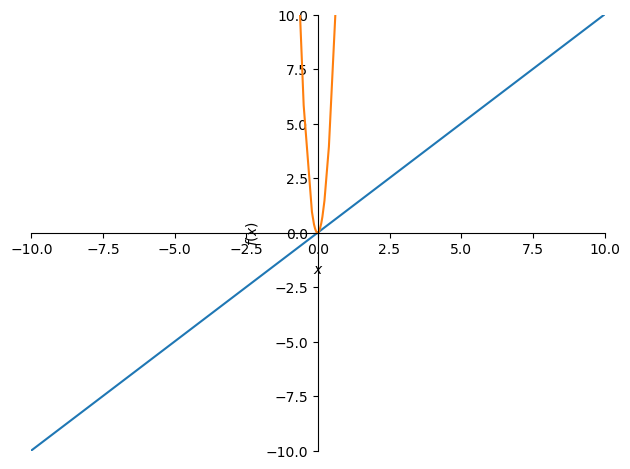

In [39]:
x,y = sp.symbols('x y')
sympy_variable = sp.integrate(x**2+5*y,(x,-1,1),(y,2*x,3*x))
plot(x,sympy_variable,ylim=(-10,10),xlim=(-10,10))

In [46]:
diff_solve=sp.diff(sympy_variable)
sp.solve(diff_solve)

[-1/75]

In [42]:
x,y,z=sp.symbols('x y z')
expression = 4*x**2+6*y+7*z**3
print(expression.evalf(3,subs={x:2,y:2,z:3}))

217.


C:\Users\tj\AppData\Local\Temp\ipykernel_3388\4081933025.py:5: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  plot(x,sp.Eq(sympy_variable))


TypeError: 'NoneType' object is not iterable

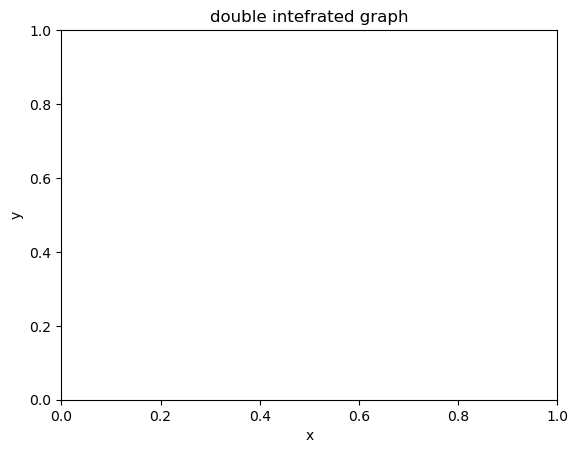

In [47]:
integrand = x**2+5*y
x=np.arange(-10,10,0.01)
sympy_variable = sp.integrate(x**2+5*y,(x,-1,1),(y,2*x,3*x))
numpy_fn
plt.plot
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.0001,0.7)
plt.xlim(-1/75,0)
plt.title('double intefrated graph')
plt.show()